# Proyek Analisis Data: [Bike sharing dataset (hour.csv daily.csv)]
- **Nama:** [Davino Edric Faturrahman]
- **Email:** [vinoedric@gmail.com]
- **ID Dicoding:** [davino_edric_faturrahman_b6RF]

## Menentukan Pertanyaan Bisnis



```
# This is formatted as code
```

- Pertanyaan 1: Apakah perbedaan musim mempengaruhi pola penggunaan / penyewaan sepeda? jika iya, maka musim manakah yang dapat menarik penyewa lebih banyak dan mengapa (time bound, specific, dan juga logis)
- Pertanyaan 2: (Tidak bergantung pada pertanyaan 1) Apakah cuaca memiliki dampak terhadap penyewaan sepeda? Jika iya, maka cuaca apakah yang memiliki penyewa lebih banyak, dan mengapa? (Time bound, specific, dan juga logis)

saya sengaja memilih pertanyaan yang mudah dijawab dan (berkemungkinan besar) dapat dianalisis dengan gampang menggunakan data yang berada di dalam file csv

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [ ]:
# Membaca dataset
day_data = pd.read_csv('./day.csv')
hour_data = pd.read_csv('./hour.csv')



### Assessing Data

In [ ]:
# Melihatkan sedikit data dari file daily
print("Daily Data Sample:")
day_data.head()


Daily Data Sample:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Melihatkan sedikit data dari file hourly
print("Hourly Data Sample:")
hour_data.head()

Hourly Data Sample:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Setelah melihat head dari dua file csv, saya mencoba mencari info dua file

In [ ]:
# Memeriksa tipe data dan missing values untuk kedua dataset
print("Info Data Harian:")
print(day_data.info())

print("Info Data Per Jam:")
print(hour_data.info())


Info Data Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
Info Data Per Jam:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1

**Insight:**
- Kedua file csv memiliki data yg relevan untuk pertanyaan bisnis (saya membaca data terlebih dahulu baru mengusulkan pertanyaan bisnis)
- Nampaknya tidak ada missing data yang ada, namun untuk berjaga2 saya mencoba melakukan drop duplicate serta memastikan tipe data

### Cleaning Data

In [ ]:
# Tidak ada missing values yang terdeteksi, namun mari kita pastikan semua kolom memiliki tipe yang tepat
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Menghapus duplikat
day_data = day_data.drop_duplicates()
hour_data = hour_data.drop_duplicates()

# Menampilkan info data yang telah dibersihkan
print("Data Harian Setelah Dibersihkan:")
day_data.info()
day_data.head()

Data Harian Setelah Dibersihkan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64        

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
print("Info Data Per Jam Setelah Dibersihkan:")
hour_data.info()
hour_data.head()

Info Data Per Jam Setelah Dibersihkan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data sudah bersih dari nilai yang hilang dan duplikat.
- Kolom dteday memiliki tipe data yang salah, maka saya ubah menjadi tipe data datetime.

## Exploratory Data Analysis (EDA)

Saya akan mencoba menjelajahi tren musiman

### Explore ...

## Visualization & Explanatory Analysis

### Pertanyaan 1:

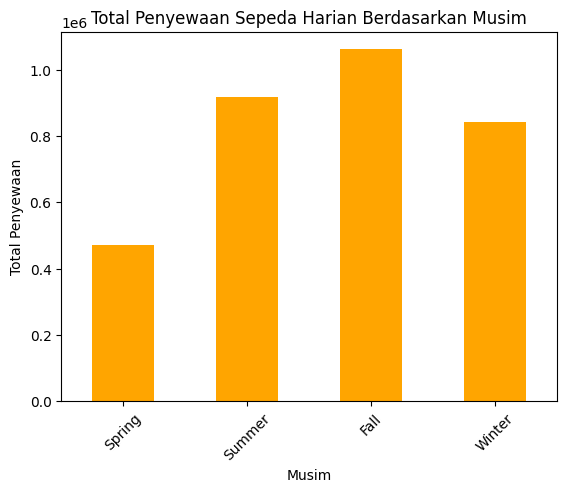

In [ ]:
# Memeriksa jumlah penyewaan berdasarkan musim (data harian)
seasonal_rentals = day_data.groupby('season')['cnt'].sum()

# Melakukan visualisasi dengan bar plot
seasonal_rentals.plot(kind='bar', color='orange')
plt.title('Total Penyewaan Sepeda Harian Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'], rotation=45)
plt.show()


- Dari sini kita dapat melihat bahwa iya, musim mempengaruhi berapa banyak sepeda yang digunakan / disewakan.
- Lebih tepatnya, di musim2 menjelang musim dingin (Fall / musim gugur memiliki hawa yang nyaman untuk bersepeda (harusnya))

### Pertanyaan 2:

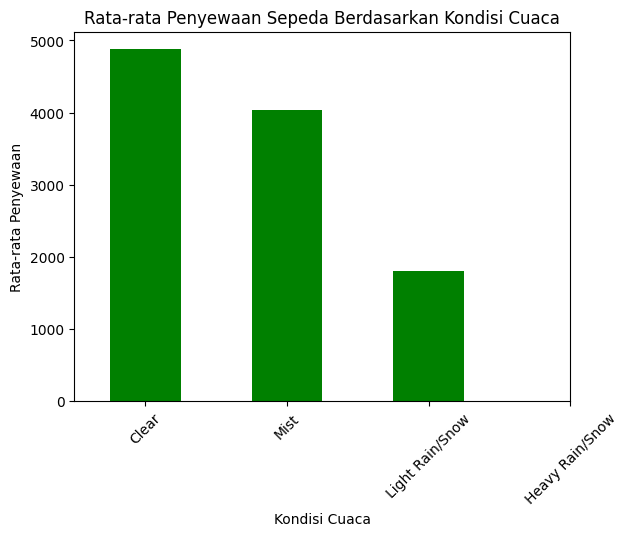

In [ ]:
# Kelompokkan berdasarkan kondisi cuaca dan plot rata-rata penyewaan untuk setiap kondisi
weather_rentals = day_data.groupby('weathersit')['cnt'].mean()

# Visualisasikan pengaruh cuaca terhadap penyewaan sepeda
weather_rentals.plot(kind='bar', color='green')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist', 'Light Rain/Snow', 'Heavy Rain/Snow'], rotation=45)
plt.show()



- Penyewaan sepeda memuncak ketika cuaca sedang cerah (masuk akalnya memang begitu)

**Insight:**
- Pertanyaan bisnis pertama telah terjawab, bahwa iya, musim memiliki dampak terhadap penyewaan sepeda
- Pertanyaan bisnis kedua juga sudah terjawab, bahwa cuaca (tidak terikat dengan perbedaan musim) pun juga memiliki dampak terhadap penyewaan sepeda

## Analisis Lanjutan (Opsional)

Saya melakakn analasis lanjutan karena saya ingin tahu jika suhu udara di hari2 tertentu membuat orang lebih ingin untuk menyewa sepeda (lebih sejuk = sewa sepeda, else = jangan sewaw)

## Conclusion

- Conclution pertanyaan 1: Iya, musim memberi dampak terhadap jumlah penyewaan sepeda, dalam kasus ini, penyewa akan lebih cenderung menyewa pada musim di musim2 yang lebih sejuk seperti musim gugur maupun musim salju/dingin, untuk musim panas sendiri saya berpendapat bahwa itu dikarenakan banyaknya aktivitas outdoor yang terjadi di musim panas (mau itu berhubungan dengan menyewa sepeda maupun tidak), maka orang akan lebih tertarik utk menyewa sepeda karena banyak org yg juga melakukan aktivitas outdoor (FOMO)
- Conclution pertanyaan 2: Cuaca (terlepas dari musimnya) juga memberikan efek yang signifikan terhadap jumlah penyewaan. Penyewa akan lebih cenderung untuk menyewa sepeda ketika langit cerah dan tidak terlihat ada hujan, di kasus kedua adalah penyewa menyewa ketika mendung atau berkabut, penyewa masih banyak dijumpai dikarenakan mendung memberi udara yang cukup sejuh dan tidak terkena paans matahari. Kasus ketiga adalah hujan ringan (gerimis) maupun salju ringan, disini saya akan anggap bahwa banyak dari entri data ini direkam ketika musim dingin (siapakah yang mau bersepeda ketika hujan gerimis, apalagi menyewa sepedanya). Untuk kasus ke empat yaitu Heavy rain/ snow storm tidak perlu dijelaskan lebih lanjut, secara logika memang tidak masuk akal untuk menyewa sepeda dalam kasus tersebut

Aksi berikutnya untuk perusahaan:
- Melakukan marketing yang sesuai dengan musim dengan musim panas dan musim semi memiliki marketing mengenai aktivitas outdoor, sementara musim dingin dan gugur memiliki marketing berdasarkan hawa sejuk yang menyenangkan untuk bersepeda
- Pantau weather forecast untuk berita mengenai hujan berikutnya maupun mendung dan atau hujan deras berikutnya. Info ini dapat membuat perusahaan lebih baik melakukan planning dan budget management di hari-hari dimana uang tidak mengalir selancar jika hari tersebut hari yang cerah